In [16]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [17]:
zillow_path = Path("../data/clean_data/zillow_data_houston_sa_austin_dallas.csv")
salary_path = Path()
zillow_df = pd.read_csv(zillow_path, infer_datetime_format=True, parse_dates=True)

zillow_df["date"] = pd.to_datetime(zillow_df["date"])
zillow_df.head()

,date,region,avg_value,zipcode,city
0,1996-01-31,75201; TX; Dallas-Fort Worth-Arlington; Dallas...,412559.0,75201,Dallas
1,1996-02-29,75201; TX; Dallas-Fort Worth-Arlington; Dallas...,413722.0,75201,Dallas
2,1996-03-31,75201; TX; Dallas-Fort Worth-Arlington; Dallas...,416215.0,75201,Dallas
3,1996-04-30,75201; TX; Dallas-Fort Worth-Arlington; Dallas...,422319.0,75201,Dallas
4,1996-05-31,75201; TX; Dallas-Fort Worth-Arlington; Dallas...,428461.0,75201,Dallas


In [18]:
salary_df = pd.read_csv("../data/clean_data/cnc_sal_data.csv", infer_datetime_format= True, parse_dates= True)
salary_df["Avg_AGI"] = salary_df["AGI"] / salary_df["NO. OF RETURNS"] * 1000
salary_df = salary_df.dropna()
salary_df.head()

,YEAR,ZIP CODE,NO. OF RETURNS,AGI,Avg_AGI
0,2007,73301,1798,7230,4021.134594
1,2007,73949,43,1915,44534.883721
2,2007,75001,7128,693056,97230.078563
3,2007,75002,26669,2002247,75077.693202
4,2007,75006,21953,1053748,48000.182207


In [21]:
zillow_year_df = zillow_df.groupby(["zipcode",zillow_df["date"].dt.year]).mean()
zillow_year_df = zillow_year_df.reset_index()
zillow_year_df = zillow_year_df.rename(columns={"date" : "YEAR", "zipcode" : "ZIP CODE"})
zillow_year_df.head()

,ZIP CODE,YEAR,avg_value
0,75201,1996,425752.833333
1,75201,1997,434680.833333
2,75201,1998,432947.333333
3,75201,1999,436265.250000
4,75201,2000,436422.583333


In [22]:
pd.merge(zillow_year_df, salary_df, on=['YEAR', 'ZIP CODE'])

,ZIP CODE,YEAR,avg_value,NO. OF RETURNS,AGI,Avg_AGI
0,75201,2007,590771.500000,4967,1998759,402407.690759
1,75201,2008,610801.750000,5235,1419874,271227.125119
2,75201,2009,571372.750000,5819,1108151,190436.672968
3,75201,2010,547731.166667,6741,1298956,192694.852396
4,75201,2011,521611.583333,7746,1489324,192270.074877
5,75201,2012,519875.500000,7390,2461051,333024.492558
6,75201,2013,562380.583333,7420,1720094,231818.598383
7,75201,2014,618267.916667,7870,2137791,271637.992376
8,75201,2015,673505.500000,8660,2596990,299883.371824
9,75201,2016,720751.750000,9330,2374895,254543.944266


In [23]:
lat_long = Path("../data/lat_long_by_zip_code.xlsx")
ll_df = pd.read_excel(lat_long)
ll_df = ll_df[["Zip Code", "Latitude","Longitude"]]
ll_df.head()

,Zip Code,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113
3,99612,55.0628,-162.3056
4,99661,55.3192,-160.4914


In [25]:
ll_df = ll_df.rename(columns={"Zip Code" : "ZIP CODE"})
ll_df.head()

,ZIP CODE,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113
3,99612,55.0628,-162.3056
4,99661,55.3192,-160.4914


In [26]:
sal_zillow_df = pd.merge(zillow_year_df, salary_df, on=['YEAR', 'ZIP CODE'])
combined_df = pd.merge(sal_zillow_df, ll_df, on=['ZIP CODE'])
combined_df.head()

,ZIP CODE,YEAR,avg_value,NO. OF RETURNS,AGI,Avg_AGI,Latitude,Longitude
0,75201,2007,590771.500000,4967,1998759,402407.690759,32.7904,-96.8044
1,75201,2008,610801.750000,5235,1419874,271227.125119,32.7904,-96.8044
2,75201,2009,571372.750000,5819,1108151,190436.672968,32.7904,-96.8044
3,75201,2010,547731.166667,6741,1298956,192694.852396,32.7904,-96.8044
4,75201,2011,521611.583333,7746,1489324,192270.074877,32.7904,-96.8044


In [32]:
def salary_by_year(df, year):
    return df[df["YEAR"]==year]

In [33]:
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
print(type(map_box_api))

<class 'str'>


In [34]:
px.set_mapbox_access_token(map_box_api)

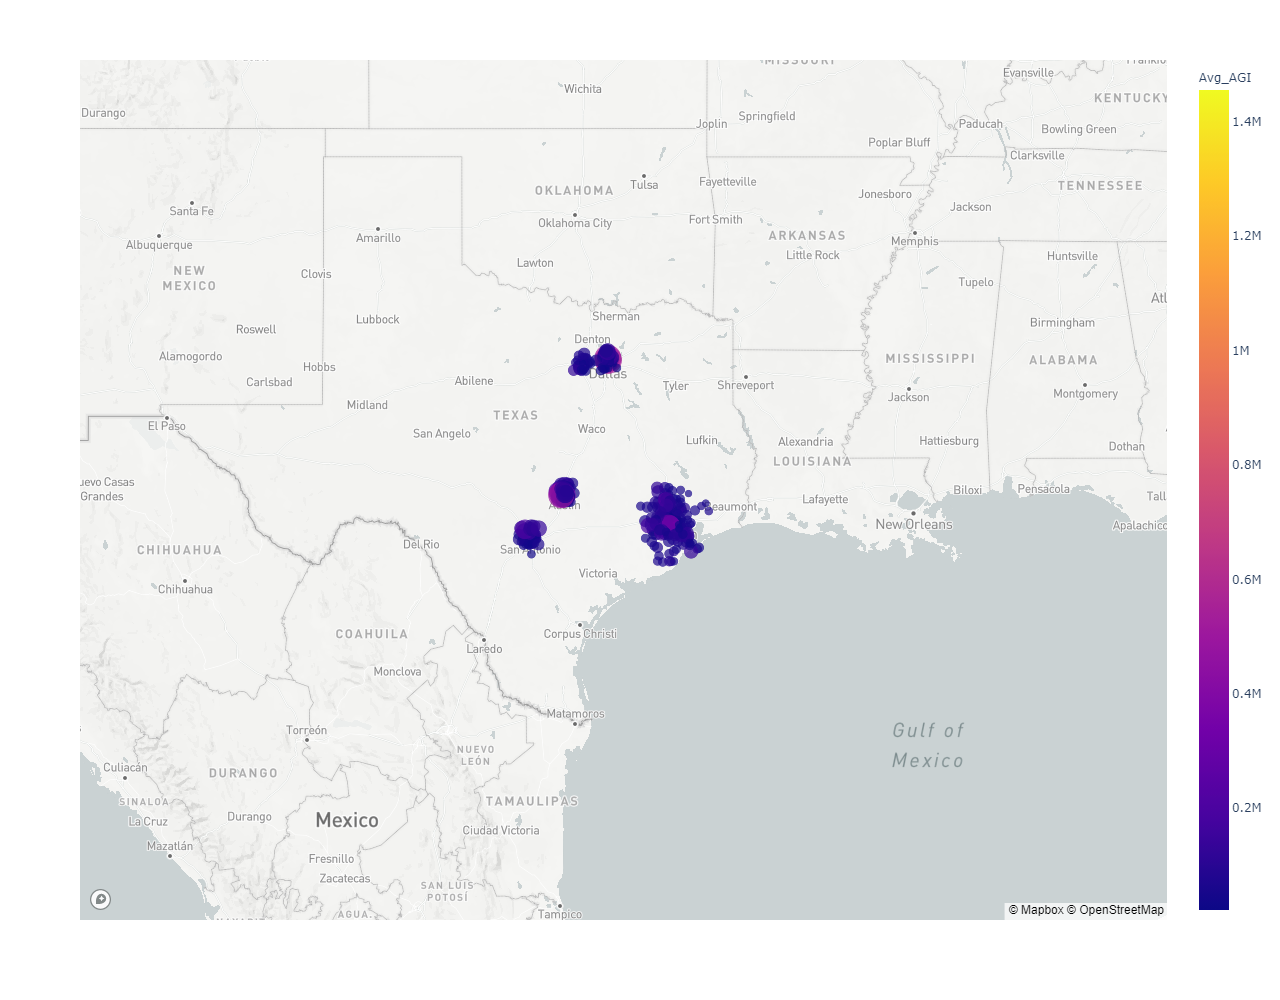

In [39]:
map_plot = px.scatter_mapbox(
    salary_by_year(combined_df,2017),
    lat="Latitude",
    lon="Longitude",
    size="avg_value",
    color="Avg_AGI",
    zoom=5,
    hover_name='ZIP CODE',
    height=1000
)
map_plot.show()